<a href="https://colab.research.google.com/github/Molashhs/spotifyTCS/blob/main/Research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Does the year predict the BPM?
By Shalom A

## Step 1 was to import any extra libraries and functions that weren't already in Colab as well as loading in my data.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

I loaded in my data set using google sheet's and named the dataset "Spotify"

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQmfwC6rSgzudX7RUqTsBlCREZZ68yVQQRqI7otYj1Zkajk-y_iUfI80sSPlk6UftjdrU0z3hbJQ_F-/pub?output=csv"
spotify=pd.read_csv(url)

# Problem
With each different generation the most popular genre changes, with each year having it’s unique preference, these different songs all had a certain feel to them. When given the data of Spotify’s most famous songs, it hadn’t occurred to me what I would be researching at the time. When I loaded my data, I wanted to look at something unique that would get me meaningful results. As well as something that I could visualize for others to see and  use if they really wanted to. So after much trial and error, for my research question I asked; Does the year a song is released correlate to the bpm, can this help predict future trends?


#Exploritory research

#Approach
Once I loaded the dataset into Colab, I explored the data for connections and potential research questions that I could approach. After mixing and matching different variables I finally landed on “Released Year” and “BPM” as the two columns I would be researching. I made a scatter plot that represented the BPM for each year to test whether or not this was worth it or not. Once I was sure about it I moved on to focusing on the average BPM according to the year and building a model to predict future trends..


In [ ]:
#Made a data frame for all the years from 1990-2026 to make it easier in genral.
all_years = range(1990, 2026)
average_bpms_by_year = {}

for year in all_years:
    year_data = spotify[spotify['released_year'] == year]
    if not year_data.empty:
        average_bpm = year_data['bpm'].mean()
        average_bpms_by_year[year] = average_bpm
    else:
        average_bpms_by_year[year] = None

# Create a DataFrame from the average BPMs by year
average_bpm_df = pd.DataFrame.from_dict(average_bpms_by_year, orient='index', columns=['Average BPM'])
average_bpm_df = average_bpm_df.dropna().reset_index()
average_bpm_df.columns = ['Year', 'Average BPM']

display(average_bpm_df.head())

,Year,Average BPM
0,1991,111.5
1,1992,92.0
2,1994,150.0
3,1995,86.0
4,1996,88.0


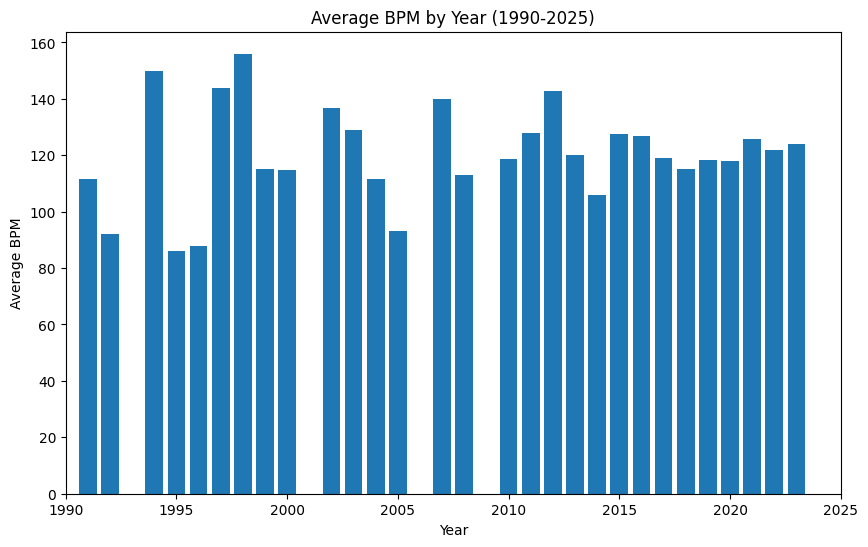

In [ ]:
#Made a visualization of the averge BPM throughout the years to see patterns
plt.figure(figsize=(10, 6))
plt.bar(average_bpm_df['Year'], average_bpm_df['Average BPM'])
plt.xlabel('Year')
plt.ylabel('Average BPM')
plt.title('Average BPM by Year (1990-2025)')
plt.xlim(1990, 2025) # Set the x-axis limits
plt.xticks(range(1990, 2026, 5)) # Set ticks every 5 years
plt.show()

In [ ]:
# Prepared my features (Year) and target variable (Average BPM)
X = average_bpm_df[['Year']]
y = average_bpm_df['Average BPM']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Created and trained the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluated the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 186.38
R-squared: -0.02


In [ ]:
# Predict future BPMs
future_years = np.arange(2024, 2036).reshape(-1, 1) # Predict for the next 10 years
predicted_bpms = model.predict(future_years)

# Create a DataFrame for predicted future BPMs
predicted_future_bpm_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Average BPM': predicted_bpms})
display(predicted_future_bpm_df.head())

,Year,Predicted Average BPM
0,2024,124.912254
1,2025,125.153578
2,2026,125.394902
3,2027,125.636227
4,2028,125.877551


#Results
After making my machine learning model I noticed that there was a low correlation between the BPM and the year. The plots were spread apart and only became more correlated towards the 2020s and beyond. According to the machine learning model the average BPM is subject to steadily increasing every year after 2023.


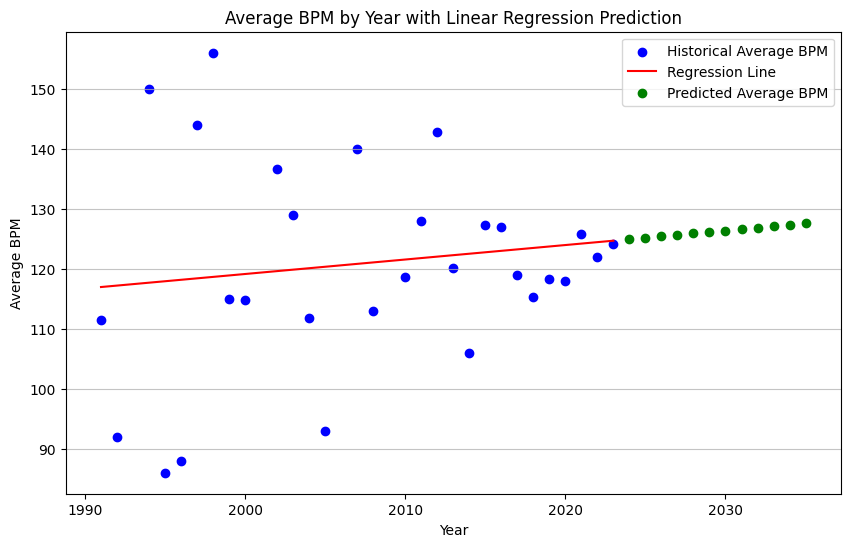

In [ ]:
# Lastly visualized the model itself (hazza!)

plt.figure(figsize=(10, 6))

# "Historical" data
plt.scatter(average_bpm_df['Year'], average_bpm_df['Average BPM'], color='blue', label='Historical Average BPM')

# Regression line
plt.plot(average_bpm_df['Year'], model.predict(average_bpm_df[['Year']]), color='red', label='Regression Line')

# Predicted future BPMs
plt.scatter(predicted_future_bpm_df['Year'], predicted_future_bpm_df['Predicted Average BPM'], color='green', label='Predicted Average BPM')

plt.xlabel('Year')
plt.ylabel('Average BPM')
plt.title('Average BPM by Year with Linear Regression Prediction')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()